# Clean up the Adenine Dataset and Write Reaction SMARTS for it
This notebook serves to help troubleshoot the SMARTS pattern for Adenine.

In [ ]:
import pandas as pd
from rdkit import Chem

## Some Standardization and Deprotection Function

In [ ]:
def standardize_and_remove_duplicates(smiles_list):
    """
    Standardize SMILES patterns and remove duplicates from a list.
    :param smiles_list: A list of SMILE strings
    :return: A list of unique, standardized SMILE strings
    """
    standardized_smiles = set()
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            standardized_smiles.add(Chem.MolToSmiles(mol, canonical=True))
    return list(standardized_smiles)

In [3]:
# Load Data
amidines = []
with open('/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/reagents/adenine/amidines.smi') as f:
    for mol in f:
        amidines.append(mol.strip())

[07:39:40] Explicit valence for atom # 3 N, 4, is greater than permitted
[07:39:40] Explicit valence for atom # 3 N, 4, is greater than permitted
[07:39:40] Explicit valence for atom # 3 N, 4, is greater than permitted


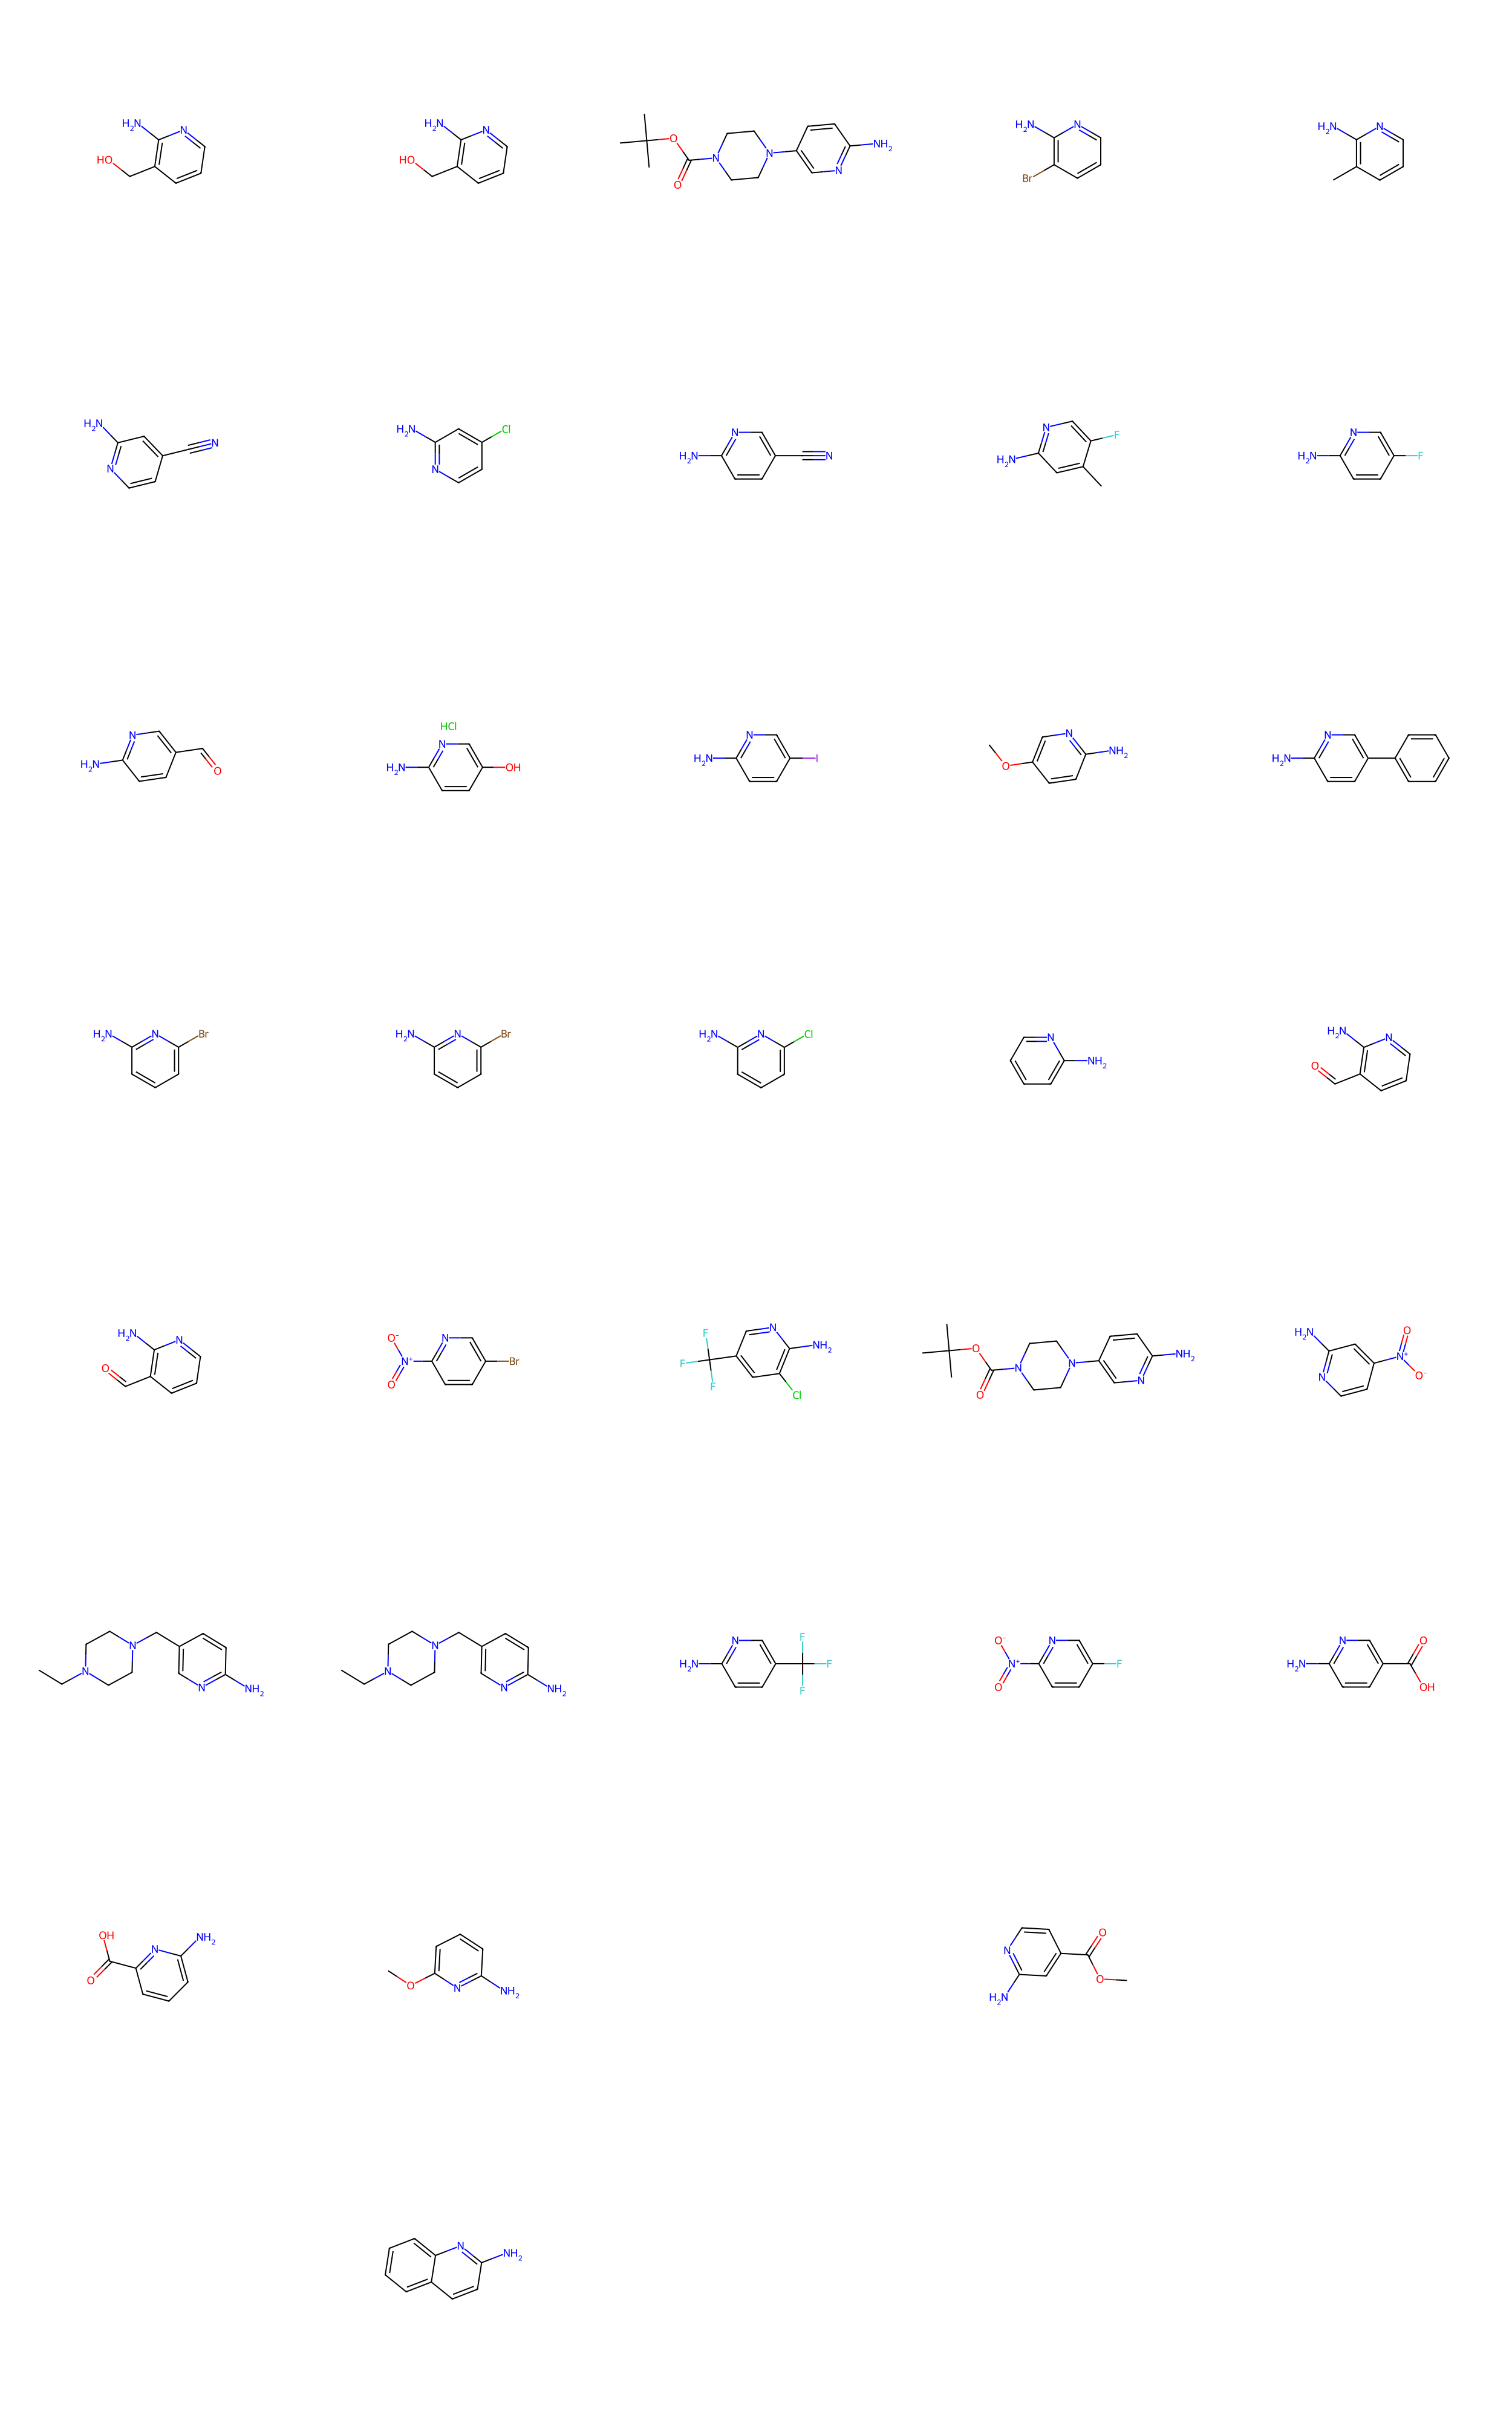

In [17]:
amidines_list = [Chem.MolFromSmiles(smiles) for smiles in amidines]
Draw.MolsToGridImage(amidines_list, molsPerRow=5, subImgSize=(500, 500), maxMols=999999)

In [10]:
aldehydes = []
with open('/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/reagents/adenine/aldehydes.smi') as f:
    for mol in f:
        aldehydes.append(mol.strip())

[07:48:11] Explicit valence for atom # 1 P, 6, is greater than permitted


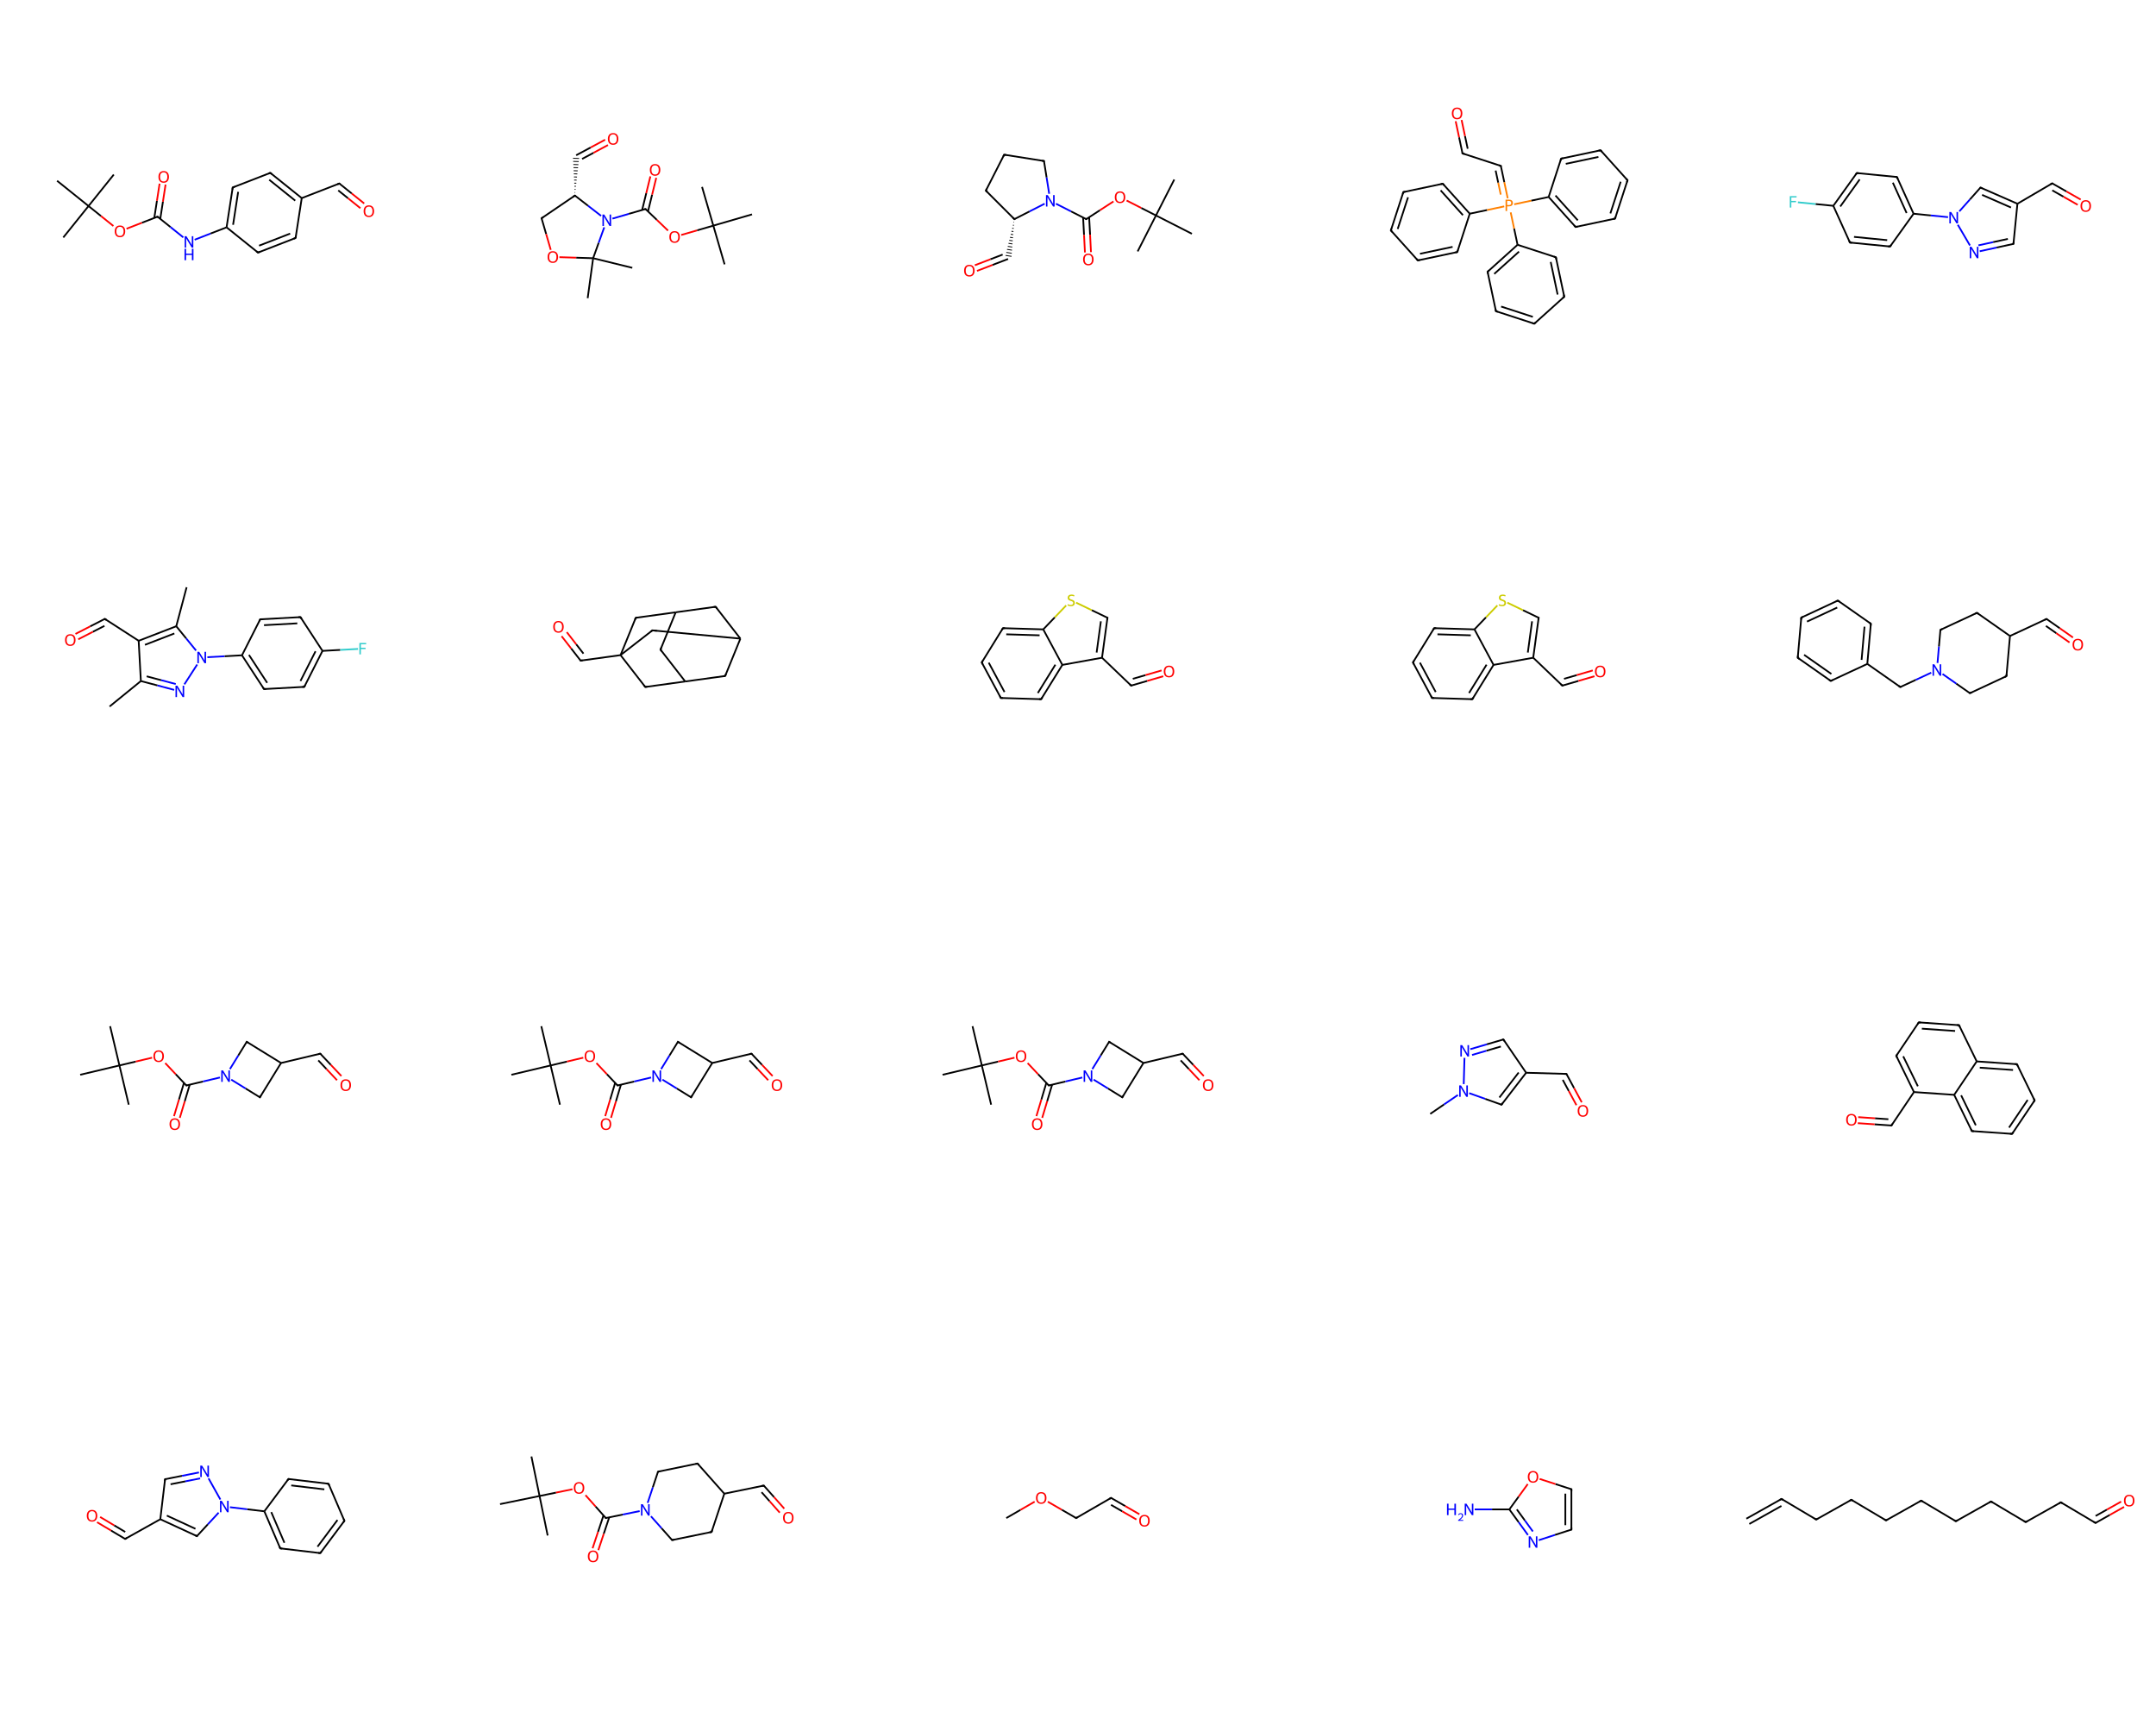

In [28]:
aldehydes_list = [Chem.MolFromSmiles(smiles) for smiles in aldehydes]
Chem.Draw.MolsToGridImage(aldehydes_list[:20], molsPerRow=5, subImgSize=(500, 500), maxMols=999999)

In [19]:
amines = []
with open('/Users/aakankschitnandkeolyar/Desktop/TACTICS/data/reagents/adenine/amines.smi') as f:
    for mol in f:
        amines.append(mol.strip())

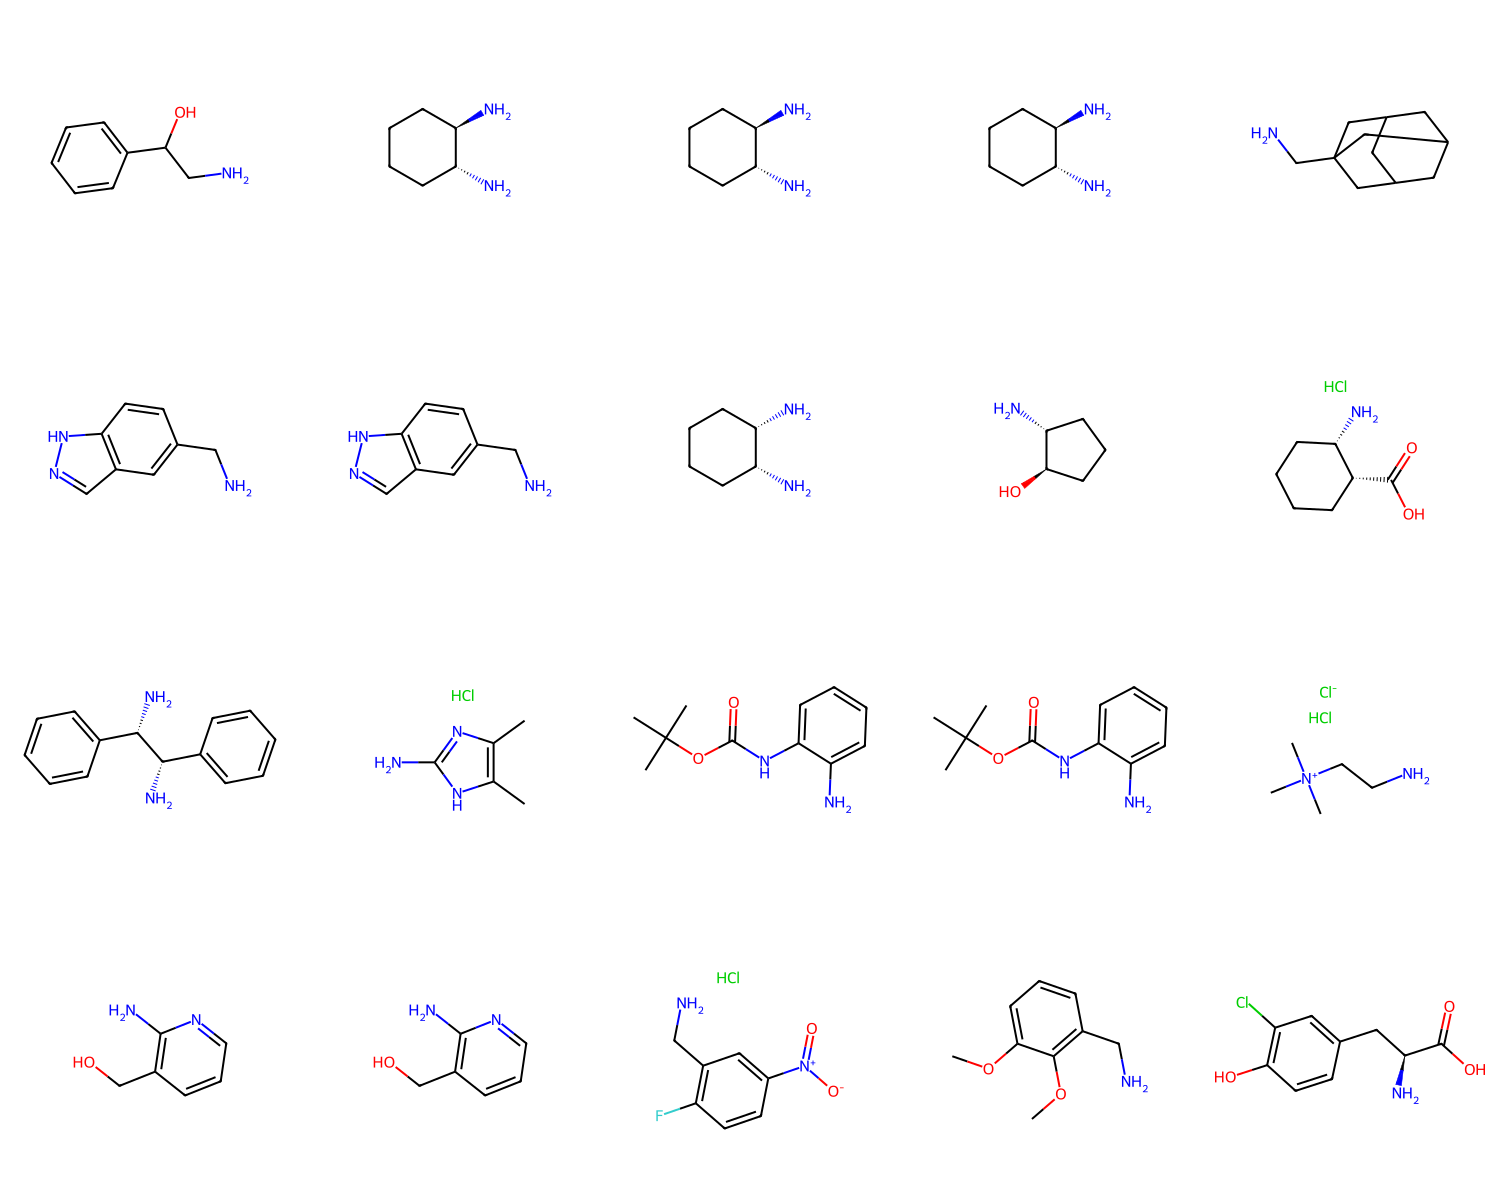

In [27]:
amines_list = [Chem.MolFromSmiles(smiles) for smiles in amines]
Chem.Draw.MolsToGridImage(amines_list[:20], molsPerRow=5, subImgSize=(300, 300), maxMols=999999)

In [ ]:
# Test SMARTS Pattern
rxn = Chem.AllChem.ReactionFromSmarts("[c:1]1[c:2][c:3][c:4]([n:5][c:6]1)[N:7].[#6:1][N:2].[#6:3](=O)>>[c]1nc(c2n([c]1)[c]([N:2][#6:1])[c:3]n2)[NH2]")
test_prod = rxn.RunReactants((amidines_list[0], amines_list[0], aldehydes_list[0]))[0][0]
Draw.MolsToGridImage([amidines_list[0], amines_list[0], aldehydes_list[0], test_prod], legends=["amine", "aldehyde", "product"], molsPerRow=3, subImgSize=(500, 500))